<a href="https://colab.research.google.com/github/diogo-franco/IA-/blob/main/AC1_Intelig%C3%AAncia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AC \#1**: Inteligência Artificial
Facens - Sorocaba

Prof. Adson Nogueira Alves

E-mail adson.alves@facens.br



In [32]:

print('211589' + ' Diogo Franco Filho')

211589 Diogo Franco Filho


## Objetivo: Prever as taxas de mortalidade por câncer para os condados dos EUA.

Explore alternativas de **regressão linear** e desenvolva o melhor modelo possível para os problemas, evitando o overfitting. Em particular, preveja a **TARGET_deathRate** a partir de seus atributos.

## Conjunto de Dados

Esses dados foram agregados de várias fontes, incluindo o American Community Survey (census.gov), clinicaltrials.gov e cancer.gov.

O conjunto de dados contém a taxa de mortalidade e os atributos de 3.047 condados.

Informações do Conjunto de Dados: Você deve respeitar a seguinte divisão treino/teste: 2042 exemplos de treino e 305 exemplos de teste.

Existem 33 atributos, conforme segue:

Dicionário de Dados

1: avgAnnCount: Número médio de casos reportados de câncer diagnosticados anualmente (a)

2: avgDeathsPerYear: Número médio de mortes reportadas devido ao câncer (a)

3: incidenceRate: Taxa média de diagnósticos de câncer per capita (100.000) (a)

4: medianIncome: Renda média por condado (b)

5: popEst2015: População do condado (b)

6: povertyPercent: Percentual da população em situação de pobreza (b)

7: studyPerCap: Número per capita de ensaios clínicos relacionados ao câncer por condado (a)

8: binnedInc: Renda média per capita agrupada por decil (b)

9: MedianAge: Idade média dos residentes do condado (b)

10: MedianAgeMale: Idade média dos residentes masculinos do condado (b)

11: MedianAgeFemale: Idade média dos residentes femininos do condado (b)

12: Geography: Nome do condado (b)

13: AvgHouseholdSize: Tamanho médio dos lares no condado (b)

14: PercentMarried: Percentual de residentes do condado casados (b)

15: PctNoHS18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o ensino médio ou menos (b)

16: PctHS18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o diploma de ensino médio (b)

17: PctSomeCol18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram algum nível de educação universitária (b)

18: PctBachDeg18_24: Percentual de residentes do condado com idades entre 18-24 anos que atingiram o diploma de bacharel (b)

19: PctHS25_Over: Percentual de residentes do condado com idades acima de 25 anos que atingiram o diploma de ensino médio (b)

20: PctBachDeg25_Over: Percentual de residentes do condado com idades acima de 25 anos que atingiram o diploma de bacharel (b)

21: PctEmployed16_Over: Percentual de residentes do condado com idades acima de 16 anos empregados (b)

22: PctUnemployed16_Over: Percentual de residentes do condado com idades acima de 16 anos desempregados (b)

23: PctPrivateCoverage: Percentual de residentes do condado com cobertura de saúde privada (b)

24: PctPrivateCoverageAlone: Percentual de residentes do condado com cobertura de saúde privada apenas (sem assistência pública) (b)

25: PctEmpPrivCoverage: Percentual de residentes do condado com cobertura de saúde privada fornecida por empregador (b)

26: PctPublicCoverage: Percentual de residentes do condado com cobertura de saúde pública (b)

27: PctPubliceCoverageAlone: Percentual de residentes do condado com cobertura de saúde pública apenas (b)

28: PctWhite: Percentual de residentes do condado que se identificam como brancos (b)

29: PctBlack: Percentual de residentes do condado que se identificam como negros (b)

30: PctAsian: Percentual de residentes do condado que se identificam como asiáticos (b)

31: PctOtherRace: Percentual de residentes do condado que se identificam como pertencentes a outras etnias que não brancos, negros ou asiáticos (b)

32: PctMarriedHouseholds: Percentual de lares casados (b)

33: BirthRate: Número de nascimentos vivos relativo ao número de mulheres no condado (b)

TARGET_deathRate: Variável dependente. Taxa média de mortalidade por câncer per capita (100.000) (a)

(a): anos de 2010 a 2016

(b): Estimativas do Censo de 2013

Os dados estão disponíveis em:

treino: https://docs.google.com/spreadsheets/d/1mglppL3qIhx5Osp2wsoENN3HPnGpzkcaFpw7i9nsTvQ/edit?usp=sharing

teste: https://docs.google.com/spreadsheets/d/1AuNcBH2c7hDEE1WScZIcbiH16fTr66C19S29d5uGnfo/edit?usp=sharing

## Atividades

1. (5 pontos) Realize a Regressão Linear. Você deve implementar alguma solução e compará-la com o sklearn.linear_model.SGDRegressor (modelo linear ajustado minimizando uma perda empírica regularizada com SGD, http://scikit-learn.org).

**Nota: Alguns fatores a considerar: Existem outliers? Há valores faltantes? Como você lidará com variáveis categóricas?**

In [33]:
#imports
import sklearn as skl
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

Ao analisar o data frame pode se observar que há valores faltantes ou muitos valores nulos em três features, que portanto foram exluidas da analise, uma vez que qualquer alteração nos dados excluiria sua originalidade.

Features excluidas:

7: studyPerCap

17: PctSomeCol18_24

24: PctPrivateCoverageAlone

In [34]:
df_train = pd.read_csv('/content/data-train - train.tsv', sep='\t')
#y_train = open.csv('gepgraphy')
df_test = pd.read_csv('/content/data-test - test.tsv', sep='\t')
indices_para_remover = [6,16,23]
df_test = df_test.drop(df_test.columns[indices_para_remover], axis=1)
df_train = df_train.drop(df_train.columns[indices_para_remover], axis=1)
print(df_train.head())
print(df_test.head())

   avganncount  avgdeathsperyear  incidencerate  medincome  popest2015  \
0        170.0                76          456.6      40012       27451   
1        232.0                84          480.5      54441       43011   
2        652.0               325          371.0      57719      149568   
3         44.0                20          472.2      42624        6561   
4        581.0               230          467.1      46849       97631   

   povertypercent           binnedinc  medianage  medianagemale  \
0            16.1  (37413.8, 40362.7]       43.2           42.1   
1            11.4  (51046.4, 54545.6]       38.2           37.1   
2            10.4  (54545.6, 61494.5]       41.7           41.0   
3            14.1  (40362.7, 42724.4]       44.8           43.3   
4            16.6    (45201, 48021.6]       42.0           41.5   

   medianagefemale  ... pctempprivcoverage  pctpubliccoverage  \
0             44.4  ...               41.6               39.4   
1             39.2  ..

Considerando que o modelo possui na coluna binnedict valores maximos e minimos foram separados esses valores entre duas novas colunas 'binnedict_lower' e 'binnedict_upper', essa decisão foi tomada para manter a originalidade dos dados considerando que até então não é sabido o impacto dessa feature na explicabilidade do problema, com o onus do aumento de dimensionalidade.

In [35]:
df_train[['binnedinc_lower', 'binnedinc_upper']] = df_train['binnedinc'].str.extract(r'[\[\(](\d+\.?\d*), (\d+\.?\d*)\]')
df_train['binnedinc_lower'] = pd.to_numeric(df_train['binnedinc_lower'])
df_train['binnedinc_upper'] = pd.to_numeric(df_train['binnedinc_upper'])
df_train = df_train.drop('binnedinc', axis=1)

df_test[['binnedinc_lower', 'binnedinc_upper']] = df_test['binnedinc'].str.extract(r'[\[\(](\d+\.?\d*), (\d+\.?\d*)\]')
df_test['binnedinc_lower'] = pd.to_numeric(df_test['binnedinc_lower'])
df_test['binnedinc_upper'] = pd.to_numeric(df_test['binnedinc_upper'])
df_test = df_test.drop('binnedinc', axis=1)

with pd.option_context('display.max_columns', None):
    print(df_train.head(1))

   avganncount  avgdeathsperyear  incidencerate  medincome  popest2015  \
0        170.0                76          456.6      40012       27451   

   povertypercent  medianage  medianagemale  medianagefemale  \
0            16.1       43.2           42.1             44.4   

                       geography  avghouseholdsize  percentmarried  \
0  Mineral County, West Virginia               2.4            44.2   

   pctnohs18_24  pcths18_24  pctbachdeg18_24  pcths25_over  pctbachdeg25_over  \
0           9.5        48.4              4.8          50.2                8.5   

   pctemployed16_over  pctunemployed16_over  pctprivatecoverage  \
0                47.0                   8.8                58.6   

   pctempprivcoverage  pctpubliccoverage  pctpubliccoveragealone   pctwhite  \
0                41.6               39.4                    23.3  94.815349   

   pctblack  pctasian  pctotherrace  pctmarriedhouseholds  birthrate  \
0  3.145379  0.299045      0.169339             42.9

Matriz de correlação para entender melhor os dados do problema e possivelmente reduzir dimensionalidade

Outro ponto interessante é que os dados estão relacionados pelos condados americanos que possuem um formato string, como esses dados são difeceis de retratar numa regressão linear, optou-se por utiliza-los com um indicie para cada condado por meio de um Label encoder.

Considerando que para aatividade é necessário correlacionar de alguma forma os dados de geografia do condado com o target death rate, e o label conder foi a melhor abordagem identificada, foram ordenados os dados de deathrate antes de codificar as varaiaveis trazendo uma correlação com os dados de geografia.

In [36]:
from sklearn.preprocessing import LabelEncoder

df_train = df_train.sort_values(by='target_deathrate')
print(df_train.head())

# encoder = LabelEncoder()
# encoder.fit(df_train['geography'])

# df_train['geography_encoded'] = encoder.transform(df_train['geography'])
# df_test['geography_encoded'] = df_test['geography'].map(lambda s: encoder.transform([s])[0] if s in encoder.classes_ else -1) # Assign -1 for unseen labels
# df_train = df_train.drop('geography', axis=1)
# df_test = df_test.drop('geography', axis=1)

# print(df_train.head())
#############################3

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
geography_encoded = encoder.fit_transform(df_train[['geography']])
geography_encoded_df = pd.DataFrame(geography_encoded, columns=encoder.get_feature_names_out(['geography']))
df_train = pd.concat([df_train, geography_encoded_df], axis=1)
df_train = df_train.drop('geography', axis=1)

geography_encoded_test = encoder.transform(df_test[['geography']])
geography_encoded_test_df = pd.DataFrame(geography_encoded_test, columns=encoder.get_feature_names_out(['geography']))
df_test = pd.concat([df_test, geography_encoded_test_df], axis=1)
df_test = df_test.drop('geography', axis=1)

#muita label com one heat encoder


      avganncount  avgdeathsperyear  incidencerate  medincome  popest2015  \
825          64.0                12          318.5      73274       17787   
1383         21.0                 7          211.1      34258        6876   
2341        138.0                26          347.1      76661       53605   
2368         66.0                15          259.0      68352       30257   
855          11.0                 4          330.6      67344        2450   

      povertypercent  medianage  medianagemale  medianagefemale  \
825              7.0       43.4           43.7             43.4   
1383            21.8       41.0           38.9             42.3   
2341             7.8       35.6           35.4             35.7   
2368             9.7       37.1           36.5             38.5   
855              8.3       51.7           51.0             52.3   

                        geography  ...  pctpubliccoveragealone   pctwhite  \
825       Pitkin County, Colorado  ...                   

Para que o modelo desempenhe melhor foram escalados os dados numericos para tratar melhor os possiveis outliers e utilizando o robust scaler e Max min scaler respectivamente

In [37]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

numeric_cols = ['target_deathrate', 'avganncount' , 'avgdeathsperyear' , 'incidencerate',  'medincome',  'popest2015','povertypercent','medianage',  'medianagemale',  'medianagefemale','avghouseholdsize',  'percentmarried' , 'pctnohs18_24',  'pcths18_24',  'pctbachdeg18_24',  'pcths25_over',  'pctbachdeg25_over',  'pctemployed16_over',  'pctunemployed16_over',  'pctprivatecoverage', 'pctempprivcoverage',  'pctpubliccoverage',  'pctpubliccoveragealone',   'pctwhite', 'pctblack',  'pctasian',  'pctotherrace',  'pctmarriedhouseholds',  'birthrate','binnedinc_lower',  'binnedinc_upper' ]

robust_scaler = StandardScaler()
df_train[numeric_cols] = robust_scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = robust_scaler.transform(df_test[numeric_cols])

# robust_scaler = RobustScaler()
# df_train[numeric_cols] = robust_scaler.fit_transform(df_train[numeric_cols])
# df_test[numeric_cols] = robust_scaler.transform(df_test[numeric_cols])

# minmax_scaler = MinMaxScaler(feature_range=(0, 100000))
# df_train[numeric_cols] = minmax_scaler.fit_transform(df_train[numeric_cols])
# df_test[numeric_cols] = minmax_scaler.transform(df_test[numeric_cols])

df_train = df_train.dropna()
df_test = df_test.dropna()

with pd.option_context('display.max_columns', None):
    print(df_train.head(1))

     avganncount  avgdeathsperyear  incidencerate  medincome  popest2015  \
825    -0.385023         -0.344478      -2.381366   2.163394   -0.257222   

     povertypercent  medianage  medianagemale  medianagefemale  \
825       -1.545505  -0.044626        0.79047         0.230701   

     avghouseholdsize  percentmarried  pctnohs18_24  pcths18_24  \
825         -0.210236       -1.984749      0.723904    -1.65745   

     pctbachdeg18_24  pcths25_over  pctbachdeg25_over  pctemployed16_over  \
825         1.992637      -3.31432           5.345187            1.796887   

     pctunemployed16_over  pctprivatecoverage  pctempprivcoverage  \
825             -0.052158            1.022475            0.052846   

     pctpubliccoverage  pctpubliccoveragealone  pctwhite  pctblack  pctasian  \
825          -2.196127               -1.586718  -0.02152 -0.407617  0.079401   

     pctotherrace  pctmarriedhouseholds  birthrate  target_deathrate  \
825     -0.245889             -0.037248    -0.0343  

Após essas etapas de préprocessamento pode se treinar o modelo seguindo o sgd

In [38]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train = df_train.drop('target_deathrate', axis=1)
y_train = df_train['target_deathrate']

model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)
X_test = df_test.drop('target_deathrate', axis=1)
y_test = df_test['target_deathrate']

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print("R²:", r2)


Mean Squared Error: 0.6022994908079875
R²: 0.3988039007223334


Considerando a matriz de correlação pode-se notar labels que não possuem tanta explicabilidade para o problema assim será reduzido a dimensionalidade dos dados com o LDA exibindo nova matriz de correlação e em seguida retreinado o modelo.

 Vale a pena mencionar também que foi utilizado o label encoder para tratamento da geograph uma vez que o objetivo é reduzir ao máximo a dimensionalidade.

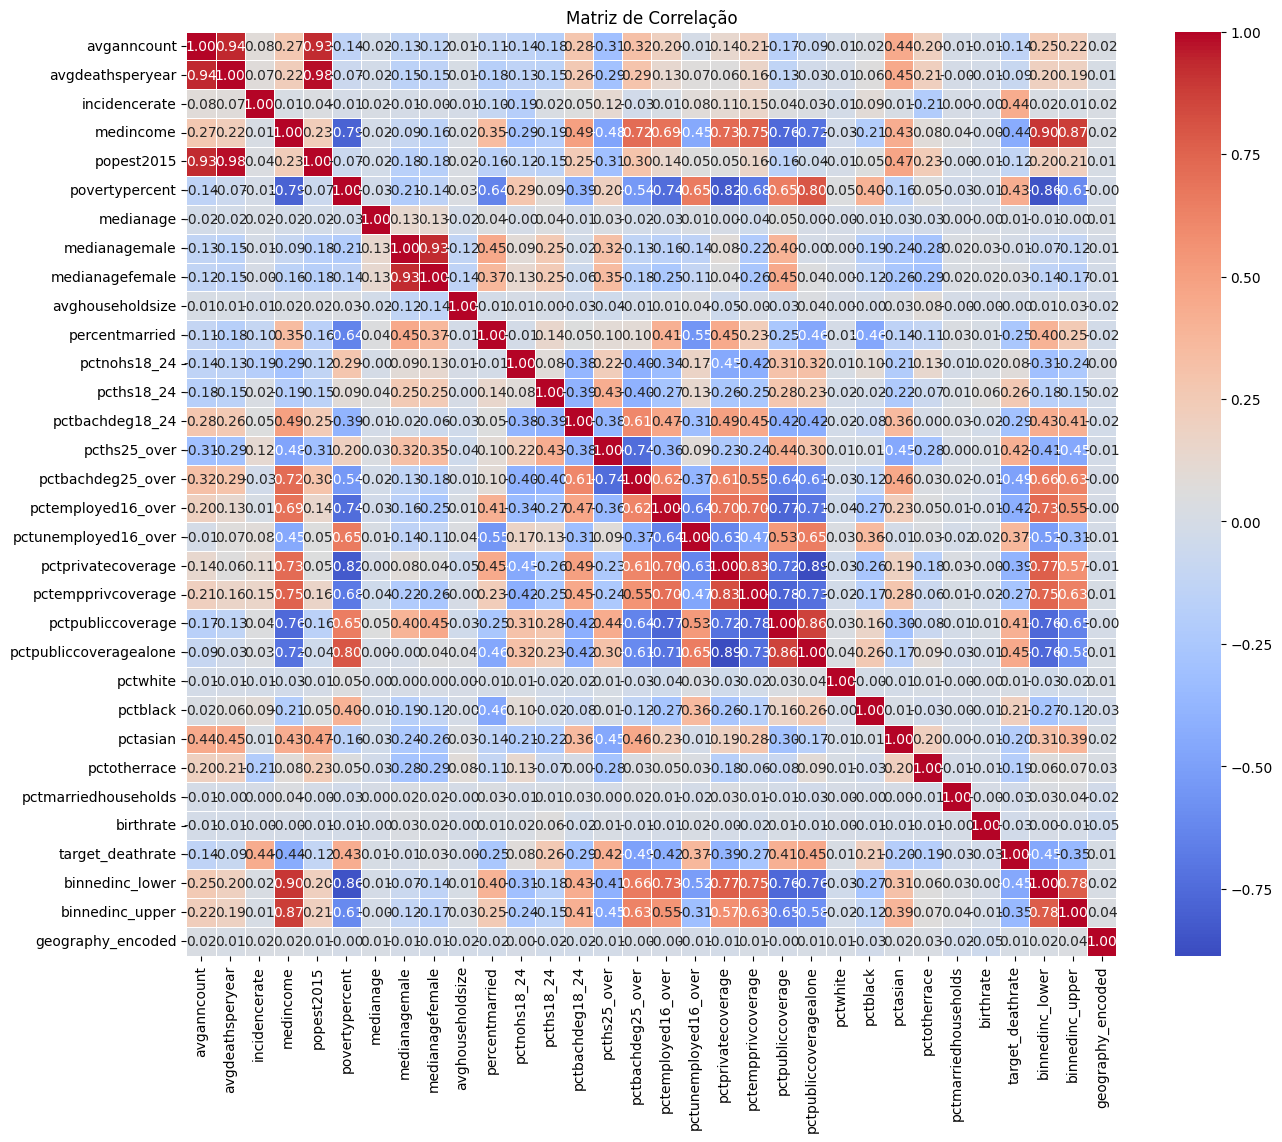

Shape de X_train original: (2604, 31)
Shape de X_train após LDA: (2604, 8)
Mean Squared Error: (MSE) com LDA: 0.5900493006476102
R² com LDA: 0.3988039007223334


In [39]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('/content/data-train - train.tsv', sep='\t')
#y_train = open.csv('gepgraphy')
df_test = pd.read_csv('/content/data-test - test.tsv', sep='\t')
indices_para_remover = [6,16,23]
df_test = df_test.drop(df_test.columns[indices_para_remover], axis=1)
df_train = df_train.drop(df_train.columns[indices_para_remover], axis=1)

df_train[['binnedinc_lower', 'binnedinc_upper']] = df_train['binnedinc'].str.extract(r'[\[\(](\d+\.?\d*), (\d+\.?\d*)\]')
df_train['binnedinc_lower'] = pd.to_numeric(df_train['binnedinc_lower'])
df_train['binnedinc_upper'] = pd.to_numeric(df_train['binnedinc_upper'])
df_train = df_train.drop('binnedinc', axis=1)

df_test[['binnedinc_lower', 'binnedinc_upper']] = df_test['binnedinc'].str.extract(r'[\[\(](\d+\.?\d*), (\d+\.?\d*)\]')
df_test['binnedinc_lower'] = pd.to_numeric(df_test['binnedinc_lower'])
df_test['binnedinc_upper'] = pd.to_numeric(df_test['binnedinc_upper'])
df_test = df_test.drop('binnedinc', axis=1)

df_train = df_train.sort_values(by='target_deathrate')

encoder = LabelEncoder()
encoder.fit(df_train['geography'])

df_train['geography_encoded'] = encoder.transform(df_train['geography'])
df_test['geography_encoded'] = df_test['geography'].map(lambda s: encoder.transform([s])[0] if s in encoder.classes_ else -1) # Assign -1 for unseen labels
df_train = df_train.drop('geography', axis=1)
df_test = df_test.drop('geography', axis=1)

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

numeric_cols = ['target_deathrate', 'avganncount' , 'avgdeathsperyear' , 'incidencerate',  'medincome',  'popest2015','povertypercent','medianage',  'medianagemale',  'medianagefemale','avghouseholdsize',  'percentmarried' , 'pctnohs18_24',  'pcths18_24',  'pctbachdeg18_24',  'pcths25_over',  'pctbachdeg25_over',  'pctemployed16_over',  'pctunemployed16_over',  'pctprivatecoverage', 'pctempprivcoverage',  'pctpubliccoverage',  'pctpubliccoveragealone',   'pctwhite', 'pctblack',  'pctasian',  'pctotherrace',  'pctmarriedhouseholds',  'birthrate','binnedinc_lower',  'binnedinc_upper' ]

robust_scaler = StandardScaler()
df_train[numeric_cols] = robust_scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = robust_scaler.transform(df_test[numeric_cols])

df_train = df_train.dropna()
df_test = df_test.dropna()

matriz_correlacao = df_train.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

X_train = df_train.drop('target_deathrate', axis=1)
y_train = df_train['target_deathrate']
X_test = df_test.drop('target_deathrate', axis=1)
y_test = df_test['target_deathrate']

n_bins = 10 # Número de bins
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y_train_discrete = discretizer.fit_transform(y_train.values.reshape(-1, 1)).flatten().astype(int)
y_test_discrete = discretizer.transform(y_test.values.reshape(-1, 1)).flatten().astype(int)

# LDA
n_components = 8  # Número de componentes desejado
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_lda = lda.fit_transform(X_train, y_train_discrete)
X_test_lda = lda.transform(X_test)

print("Shape de X_train original:", X_train.shape)
print("Shape de X_train após LDA:", X_train_lda.shape)

model_lda = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model_lda.fit(X_train_lda, y_train)

y_pred_lda = model_lda.predict(X_test_lda)

mse_lda = mean_squared_error(y_test, y_pred_lda)
print("Mean Squared Error: (MSE) com LDA:", mse_lda)
r2 = r2_score(y_test, y_pred)
print("R² com LDA:", r2)


Para comparação como o sgd regressor foi escolhia a random forest regressor uma vez que esse modelo é mais robusto e menos vulnerável a escalabilidade dos dados, aspecto que trouxe grande impacto no sgd regressor.

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
r2 = r2_score(y_test, y_pred)
print("R² decision tree:", r2)

MSE: 0.4995229102333352
R² decision tree: 0.50139219820817



## Conclusões Atividade 1

Quais são as conclusões? (1-2 parágrafos)




As conclusões foram as seguintes:



*   O SGD regressor teve muita vulnerabilidade em questão a escala dos dados logo, exigiu mais do pré processamento.

*   O SGD regressor acabou sendo vulneravel a quantidade de features, para dataframe com muitas features o modelo é pouco robusto, porém mostra resultados interessantes mesmo reduzindo a dimensionalidade com o LDA.

*   O SGD regressor com dimensionalidade reduzida teve um menor tempo de execução o que leva a crer que uma vantagen desse modelo é o baixo poder computacional que ele exige quando se tem poucas features.

*   O random forest teve bom resultado mesmo com poucas iterações e os dados com maior escala o que era de se esperar

*  o random forest teve um tempo de execução maior do que o SGD regressor após lda porém ainda assim melhor que o sgd regressor sem redução de dimensionalidade

* Pôde-se notar que o data frame possui muitas features que não explicam bem o problema, logo, seria interessante utilizar um método de redução de features que apenas exclua, para manter explicabilidade e reduzir o custo computacoinal






  

2. (2 pontos) Utilize 3 diferentes taxas de aprendizado de Gradiente Descendente (GD) ao otimizar. Compare as soluções baseadas em GD com a Equação Normal. Quais são as conclusões?


In [60]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df_train = pd.read_csv('/content/data-train - train.tsv', sep='\t')
#y_train = open.csv('gepgraphy')
df_test = pd.read_csv('/content/data-test - test.tsv', sep='\t')
indices_para_remover = [6,16,23]
df_test = df_test.drop(df_test.columns[indices_para_remover], axis=1)
df_train = df_train.drop(df_train.columns[indices_para_remover], axis=1)

df_train[['binnedinc_lower', 'binnedinc_upper']] = df_train['binnedinc'].str.extract(r'[\[\(](\d+\.?\d*), (\d+\.?\d*)\]')
df_train['binnedinc_lower'] = pd.to_numeric(df_train['binnedinc_lower'])
df_train['binnedinc_upper'] = pd.to_numeric(df_train['binnedinc_upper'])
df_train = df_train.drop('binnedinc', axis=1)

df_test[['binnedinc_lower', 'binnedinc_upper']] = df_test['binnedinc'].str.extract(r'[\[\(](\d+\.?\d*), (\d+\.?\d*)\]')
df_test['binnedinc_lower'] = pd.to_numeric(df_test['binnedinc_lower'])
df_test['binnedinc_upper'] = pd.to_numeric(df_test['binnedinc_upper'])
df_test = df_test.drop('binnedinc', axis=1)

df_train = df_train.sort_values(by='target_deathrate')

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
geography_encoded = encoder.fit_transform(df_train[['geography']])
geography_encoded_df = pd.DataFrame(geography_encoded, columns=encoder.get_feature_names_out(['geography']))
df_train = pd.concat([df_train, geography_encoded_df], axis=1)
df_train = df_train.drop('geography', axis=1)

geography_encoded_test = encoder.transform(df_test[['geography']])
geography_encoded_test_df = pd.DataFrame(geography_encoded_test, columns=encoder.get_feature_names_out(['geography']))
df_test = pd.concat([df_test, geography_encoded_test_df], axis=1)
df_test = df_test.drop('geography', axis=1)

# encoder = LabelEncoder()
# encoder.fit(df_train['geography'])

# df_train['geography_encoded'] = encoder.transform(df_train['geography'])
# df_test['geography_encoded'] = df_test['geography'].map(lambda s: encoder.transform([s])[0] if s in encoder.classes_ else -1) # Assign -1 for unseen labels
# df_train = df_train.drop('geography', axis=1)
# df_test = df_test.drop('geography', axis=1)



numeric_cols = ['target_deathrate', 'avganncount' , 'avgdeathsperyear' , 'incidencerate',  'medincome',  'popest2015','povertypercent','medianage',  'medianagemale',  'medianagefemale','avghouseholdsize',  'percentmarried' , 'pctnohs18_24',  'pcths18_24',  'pctbachdeg18_24',  'pcths25_over',  'pctbachdeg25_over',  'pctemployed16_over',  'pctunemployed16_over',  'pctprivatecoverage', 'pctempprivcoverage',  'pctpubliccoverage',  'pctpubliccoveragealone',   'pctwhite', 'pctblack',  'pctasian',  'pctotherrace',  'pctmarriedhouseholds',  'birthrate','binnedinc_lower',  'binnedinc_upper' ]

robust_scaler = StandardScaler()
df_train[numeric_cols] = robust_scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = robust_scaler.transform(df_test[numeric_cols])

df_train = df_train.dropna()
df_test = df_test.dropna()

X_train = df_train.drop('target_deathrate', axis=1)
y_train = df_train['target_deathrate']
X_test = df_test.drop('target_deathrate', axis=1)
y_test = df_test['target_deathrate']

initial_learning_rate = 0.0001
power_t = 0.15

model_invscaling_lr = SGDRegressor(learning_rate='invscaling', eta0=initial_learning_rate,
                                    power_t=power_t, max_iter=1000, tol=1e-3, random_state=42)
model_invscaling_lr.fit(X_train, y_train)
y_pred_invscaling = model_invscaling_lr.predict(X_test)
mse_invscaling = mean_squared_error(y_test, y_pred_invscaling)
print(f"MSE com taxa de aprendizado invscaling (eta0={initial_learning_rate}, power_t={power_t}): {mse_invscaling}")
r2 = r2_score(y_test, y_pred)
print("R²com taxa de aprendizado invscaling eta0=0.0001, power_t=0.15:", r2)

initial_learning_rate = 0.1
power_t = 0.15

model_invscaling_lr = SGDRegressor(learning_rate='invscaling', eta0=initial_learning_rate,
                                    power_t=power_t, max_iter=1000, tol=1e-3, random_state=42)
model_invscaling_lr.fit(X_train, y_train)
y_pred_invscaling = model_invscaling_lr.predict(X_test)
mse_invscaling = mean_squared_error(y_test, y_pred_invscaling)
print(f"MSE com taxa de aprendizado invscaling (eta0={initial_learning_rate}, power_t={power_t}): {mse_invscaling}")
r2 = r2_score(y_test, y_pred)
print("R²com taxa de aprendizado invscaling eta0=0.1, power_t=0.15:", r2)

initial_learning_rate = 0.8
power_t = 0.15

model_invscaling_lr = SGDRegressor(learning_rate='invscaling', eta0=initial_learning_rate,
                                    power_t=power_t, max_iter=1000, tol=1e-3, random_state=42)
model_invscaling_lr.fit(X_train, y_train)
y_pred_invscaling = model_invscaling_lr.predict(X_test)
mse_invscaling = mean_squared_error(y_test, y_pred_invscaling)
print(f"MSE com taxa de aprendizado invscaling (eta0={initial_learning_rate}, power_t={power_t}): {mse_invscaling}")
r2 = r2_score(y_test, y_pred)
print("R²com taxa de aprendizado invscaling eta0=0.8, power_t=0.15:", r2)

MSE com taxa de aprendizado invscaling (eta0=0.0001, power_t=0.15): 0.6117660257913852
R²com taxa de aprendizado invscaling eta0=0.0001, power_t=0.15: 0.50139219820817
MSE com taxa de aprendizado invscaling (eta0=0.1, power_t=0.15): 5.6129101980940496e+22
R²com taxa de aprendizado invscaling eta0=0.1, power_t=0.15: 0.50139219820817
MSE com taxa de aprendizado invscaling (eta0=0.8, power_t=0.15): 3.258054169203765e+24
R²com taxa de aprendizado invscaling eta0=0.8, power_t=0.15: 0.50139219820817


3. (3 pontos) Às vezes, precisamos de uma função mais complexa para fazer boas previsões. Elabore e avalie um modelo de Regressão Linear Polinomial.


In [42]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

df_train = pd.read_csv('/content/data-train - train.tsv', sep='\t')
#y_train = open.csv('gepgraphy')
df_test = pd.read_csv('/content/data-test - test.tsv', sep='\t')
indices_para_remover = [6,16,23]
df_test = df_test.drop(df_test.columns[indices_para_remover], axis=1)
df_train = df_train.drop(df_train.columns[indices_para_remover], axis=1)

df_train[['binnedinc_lower', 'binnedinc_upper']] = df_train['binnedinc'].str.extract(r'[\[\(](\d+\.?\d*), (\d+\.?\d*)\]')
df_train['binnedinc_lower'] = pd.to_numeric(df_train['binnedinc_lower'])
df_train['binnedinc_upper'] = pd.to_numeric(df_train['binnedinc_upper'])
df_train = df_train.drop('binnedinc', axis=1)

df_test[['binnedinc_lower', 'binnedinc_upper']] = df_test['binnedinc'].str.extract(r'[\[\(](\d+\.?\d*), (\d+\.?\d*)\]')
df_test['binnedinc_lower'] = pd.to_numeric(df_test['binnedinc_lower'])
df_test['binnedinc_upper'] = pd.to_numeric(df_test['binnedinc_upper'])
df_test = df_test.drop('binnedinc', axis=1)

df_train = df_train.sort_values(by='target_deathrate')

encoder = LabelEncoder()
encoder.fit(df_train['geography'])

df_train['geography_encoded'] = encoder.transform(df_train['geography'])
df_test['geography_encoded'] = df_test['geography'].map(lambda s: encoder.transform([s])[0] if s in encoder.classes_ else -1) # Assign -1 for unseen labels
df_train = df_train.drop('geography', axis=1)
df_test = df_test.drop('geography', axis=1)

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

numeric_cols = ['target_deathrate', 'avganncount' , 'avgdeathsperyear' , 'incidencerate',  'medincome',  'popest2015','povertypercent','medianage',  'medianagemale',  'medianagefemale','avghouseholdsize',  'percentmarried' , 'pctnohs18_24',  'pcths18_24',  'pctbachdeg18_24',  'pcths25_over',  'pctbachdeg25_over',  'pctemployed16_over',  'pctunemployed16_over',  'pctprivatecoverage', 'pctempprivcoverage',  'pctpubliccoverage',  'pctpubliccoveragealone',   'pctwhite', 'pctblack',  'pctasian',  'pctotherrace',  'pctmarriedhouseholds',  'birthrate','binnedinc_lower',  'binnedinc_upper' ]

robust_scaler = StandardScaler()
df_train[numeric_cols] = robust_scaler.fit_transform(df_train[numeric_cols])
df_test[numeric_cols] = robust_scaler.transform(df_test[numeric_cols])

df_train = df_train.dropna()
df_test = df_test.dropna()

X_train = df_train.drop('target_deathrate', axis=1)
y_train = df_train['target_deathrate']
X_test = df_test.drop('target_deathrate', axis=1)
y_test = df_test['target_deathrate']

degree = 2
poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred)
print("R² Regressão linear", r2)
print("Mean Squared Error: (MSE) com Polynomial Regression:", mse_poly)


R² Regressão linear 0.50139219820817
Mean Squared Error: (MSE) com Polynomial Regression: 9.585428989331604


## Conclusões Atividades 2 e 3

* O SGD regressor com o oneheat encoder e a taxa de aprendizado melhoraram muito o tempo de processamento sendo maior que o SGD regressor com o LDA, mesmo aumentando a quantidade de features para mais de 3000

* O Polynomial regression, se comparado aos outros modelos, obteve o r^2 esperado, porém houve um aumento do MSE, portanto fica evidente um possivel refinamento do modelo, mas ainda assim é um bom resultado


*Coloque sua resposta aqui ...*

## Resultados com o Conjunto de Dados de Teste


In [43]:
# seu codigo


In [63]:
# Random forest regressor                                 # (geography: label encoder)  [40]
print("Random forest regressor")
print("MSE: 0.4995229102333352\nR² decision tree: 0.50139219820817\n")
#Linear Model with SDGRegressor                           # (geography: one heat encoder) [38]
print("Linear Model with SDGRegressor")
print("Mean Squared Error: 0.6022994908079875")
print("R²: 0.3988039007223334\n")
#Linear Model with SDGRegressor LDA                       # (geography: label encoder)   [39]
print("Linear Model with SDGRegressor LDA")
print("Shape de X_train original: (2604, 31)\nShape de X_train após LDA: (2604, 8)\nMean Squared Error: (MSE) com LDA: 0.5900493006476102\nR² com LDA: 0.3988039007223334\n")
#Linear Model with SDGRegressor taxas de aprendizado    # (geography: one heat encoder) [60]
print("Linear Model with SDGRegressor taxas de aprendizado")
print("MSE com taxa de aprendizado invscaling (eta0=0.0001, power_t=0.15): 0.6117660257913852\nR²com taxa de aprendizado invscaling eta0=0.0001, power_t=0.15: 0.50139219820817\nMSE com taxa de aprendizado invscaling (eta0=0.1, power_t=0.15): 5.6129101980940496e+22\nR²com taxa de aprendizado invscaling eta0=0.1, power_t=0.15: 0.50139219820817\nMSE com taxa de aprendizado invscaling (eta0=0.8, power_t=0.15): 3.258054169203765e+24\nR²com taxa de aprendizado invscaling eta0=0.8, power_t=0.15: 0.50139219820817\n")
# Polynomial model with SDGRegressor                     #  (geography: label encoder)  [42]
print("Polynomial model with SDGRegressor")
print("Mean Squared Error: (MSE) com Polynomial Regression: 0.6022994908079875\nR² Regressão linear 0.3988039007223334\n")

Random forest regressor
MSE: 0.4995229102333352
R² decision tree: 0.50139219820817

Linear Model with SDGRegressor
Mean Squared Error: 0.6022994908079875
R²: 0.3988039007223334

Linear Model with SDGRegressor LDA
Shape de X_train original: (2604, 31)
Shape de X_train após LDA: (2604, 8)
Mean Squared Error: (MSE) com LDA: 0.5900493006476102
R² com LDA: 0.3988039007223334

Linear Model with SDGRegressor taxas de aprendizado
MSE com taxa de aprendizado invscaling (eta0=0.0001, power_t=0.15): 0.6117660257913852
R²com taxa de aprendizado invscaling eta0=0.0001, power_t=0.15: 0.50139219820817
MSE com taxa de aprendizado invscaling (eta0=0.1, power_t=0.15): 5.6129101980940496e+22
R²com taxa de aprendizado invscaling eta0=0.1, power_t=0.15: 0.50139219820817
MSE com taxa de aprendizado invscaling (eta0=0.8, power_t=0.15): 3.258054169203765e+24
R²com taxa de aprendizado invscaling eta0=0.8, power_t=0.15: 0.50139219820817

Polynomial model with SDGRegressor
Mean Squared Error: (MSE) com Polynomia

## Prazo

Terça-feira, 04 de abril, às 23h59.

Política de penalização para envio atrasado: Não é encorajado o envio de sua tarefa após a data de vencimento. No entanto, caso você o faça, sua nota será penalizada da seguinte forma:

05 de abril, 23h59: nota * 0,75
06 de abril, 23h59: nota * 0,5
07 de abril, 23h59: nota * 0,25
Após: nota * 0


## Envio

Por e-mail adson.alves@facens.br, envie seu Notebook.

Esta atividade é individual.